In [34]:
import matplotlib.pyplot as plt
import numpy as np
from pylab import colorbar,axis,title,show
import nidaqmx
from nidaqmx import constants
from nidaqmx import stream_readers
from nidaqmx import stream_writers
import os
import time

In [35]:
# task_write2 = nidaqmx.Task()
# task_write2.ao_channels.add_ao_voltage_chan("Dev1/ao0", min_val=-0.2, max_val=0.8)

task_write0 = nidaqmx.Task()
task_write0.ao_channels.add_ao_voltage_chan("Dev5/ao1", min_val=0, max_val=5)
# task_write.start()

AOChannel(name=Dev5/ao1)

In [17]:
task_dig = nidaqmx.Task()
task_dig.do_channels.add_do_chan('Dev5/port0/line0')

DOChannel(name=Dev5/port0/line0)

In [36]:
def daq_sqwave(n):
    for _ in range(n):
        task_dig.write(True) ## 500 mV pk-pk
        # task_write2.stop()
        time.sleep(0.01)
        task_dig.write(False)
        # task_write0.stop()
        # task_dig.stop()
        time.sleep(0.05)
        task_dig.stop()
    return 'Done'

In [37]:
daq_sqwave(100)

'Done'

In [7]:
from AMC_python import AMC

# import time

IP = "192.168.1.1"

# Setup connection to AMC
amc = AMC.Device(IP)
amc.connect()

In [8]:
axis0 = 0 # Axis 1
amc.control.setControlOutput(axis0, True)

# Activate axis 2
axis1 = 1 # Axis 2
amc.control.setControlOutput(axis1, True)
axis2 = 2 # Axis 3
amc.control.setControlOutput(axis2, True)

In [9]:
frequency0 = amc.control.getControlFrequency(axis0)
frequency1 = amc.control.getControlFrequency(axis1)
amp0 = amc.control.getControlAmplitude(axis0)
amp1 = amc.control.getControlAmplitude(axis1)

In [7]:
# (amc.move.getPosition(axis0),amc.move.getPosition(axis1))
amp0

35101

In [135]:
# def raster_scan(x_move,y_move,x_step,y_step):
#     # x_step = 1
#     # y_step = 50
#     pos_xy = []
#     # j = 0
#     # pos_xy = [(amc.move.getPosition(axis0),amc.move.getPosition(axis1))]
#     for i in range(y_move):
#         x = i
#         amc.move.setNSteps(axis1, False, y_step)
#         pos_xy.append((amc.move.getPosition(axis0),amc.move.getPosition(axis1)))
#         print(i,(amc.move.getPosition(axis0),amc.move.getPosition(axis1)))
#         daq_sqwave(1)
#         time.sleep(0.8)
#         # print('Pos_y: ',amc.move.getPosition(axis1))
#         for j in range(x_move):
#             # amc.move.setNSteps(axis0, x%2, x_step)
#             amc.move.setNSteps(axis0, x%2, x_step)
#             pos_xy.append((amc.move.getPosition(axis0),amc.move.getPosition(axis1)))
#             daq_sqwave(1)
#             print(j,i,(amc.move.getPosition(axis0),amc.move.getPosition(axis1)))
#             time.sleep(0.8)
           
#             # pos_x.append(amc.move.getPosition(axis0))
#         # print('Pos_x: ',amc.move.getPosition(axis0))
#         # pos_xy.append((amc.move.getPosition(axis0),amc.move.getPosition(axis1)))
#         # amc.move.setNSteps(axis1, False, y_step)
#         # pos_xy.append((amc.move.getPosition(axis0),amc.move.getPosition(axis1)))
#         # print(j,i,(amc.move.getPosition(axis0),amc.move.getPosition(axis1)))
#         # daq_sqwave(1)
#         # time.sleep(0.5)
#     # return print('Scan Over')
#     return pos_xy

In [10]:
### TEST

def raster_scan(x_move,y_move,x_step,y_step):
    # x_step = 1
    # y_step = 50
    pos_xy = []
    # j = 0
    # pos_xy = [(amc.move.getPosition(axis0),amc.move.getPosition(axis1))]
    for i in range(y_move):
        x = i
        amc.move.setNSteps(axis1, False, y_step)
        pos_xy.append((amc.move.getPosition(axis0),amc.move.getPosition(axis1)))
        print(i,(amc.move.getPosition(axis0),amc.move.getPosition(axis1)))
        daq_sqwave(1)
        time.sleep(0.2)
        for j in range(x_move):
            # amc.move.setNSteps(axis0, x%2, x_step)
            if x%2 == 1:
                amc.control.setControlAmplitude(axis0,35101)
            else:
                amc.control.setControlAmplitude(axis0,41001)
            amc.move.setNSteps(axis0, x%2, x_step)
            pos_xy.append((amc.move.getPosition(axis0),amc.move.getPosition(axis1)))
            daq_sqwave(1)
            print(j,i,amc.control.getControlAmplitude(axis0),(amc.move.getPosition(axis0),amc.move.getPosition(axis1)))
            time.sleep(0.2)
           
            # pos_x.append(amc.move.getPosition(axis0))
        # print('Pos_x: ',amc.move.getPosition(axis0))
        # pos_xy.append((amc.move.getPosition(axis0),amc.move.getPosition(axis1)))
        # amc.move.setNSteps(axis1, False, y_step)
        # pos_xy.append((amc.move.getPosition(axis0),amc.move.getPosition(axis1)))
        # print(j,i,(amc.move.getPosition(axis0),amc.move.getPosition(axis1)))
        # # daq_sqwave(1)
        # time.sleep(0.5)
    # return print('Scan Over')
    return pos_xy

In [11]:
x_step = 2
y_step = 2
y_move = 30
x_move = 29
p = raster_scan(x_move,y_move,x_step,y_step)

0 (8588.27, 35605.917)
0 0 40999 (10104.631, 35613.417)
1 0 40999 (11594.232, 35615.539)
2 0 40999 (13194.637, 35621.561)
3 0 40999 (14924.31, 35621.118)
4 0 40999 (16595.878, 35614.709)
5 0 40999 (18221.539, 35619.516)
6 0 40999 (19834.713, 35617.666)
7 0 40999 (21404.79, 35621.309)
8 0 40999 (23001.947, 35621.995)
9 0 40999 (24709.31, 35623.822)
10 0 40999 (26369.58, 35620.923)
11 0 40999 (27906.503, 35625.376)
12 0 40999 (29422.774, 35623.569)
13 0 40999 (30914.349, 35619.43)
14 0 40999 (32440.656, 35623.331)
15 0 40999 (34128.446, 35622.911)
16 0 40999 (35842.017, 35621.323)
17 0 40999 (37471.942, 35626.521)
18 0 40999 (39093.975, 35624.99)
19 0 40999 (40677.379, 35628.047)
20 0 40999 (42231.711, 35624.332)
21 0 40999 (43858.403, 35623.264)
22 0 40999 (45552.081, 35624.981)
23 0 40999 (47109.031, 35624.313)
24 0 40999 (48606.471, 35622.348)
25 0 40999 (50092.901, 35623.259)
26 0 40999 (51557.602, 35622.291)
27 0 40999 (53123.135, 35625.462)
28 0 40999 (54815.33, 35625.634)
1 (54809

C:\Users\Praveen\anaconda3\lib\site-packages\nidaqmx\task.py:98: ResourceWarning: Task of name "_unnamedTask<0>" was not explicitly closed before it was destructed. Resources on the task device may still be reserved.
  warnings.warn(


KeyboardInterrupt: 

900


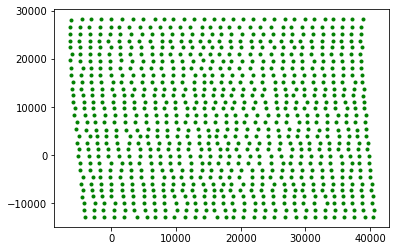

In [24]:
print(len(p))
# plt.scatter(p[0],p[1])
plt.plot(*zip(*p),'g.')

path = 'C:\\Users\\Praveen\\Desktop\\NVspectrum'
plt.savefig(path+'\\Scan_xy_v37.jpg',format='jpg')

In [23]:
import pandas as pd
df = pd.DataFrame(p, columns = ['X_data','Y_data'])

path = 'C:\\Users\\Praveen\\Desktop\\NVspectrum\\29_08_2022'
df.to_csv(path+'\\filenew_xy_v37.dat', index=False)

In [20]:
for i in range(y_move):    
    amc.move.setNSteps(axis1, True, y_step)

In [84]:
pos1f = amc.move.getPosition(axis0)
for i in range(1):    
    amc.move.setNSteps(axis0, False, y_step)
    time.sleep(0.8)
    
pos2f = amc.move.getPosition(axis0)

In [85]:
abs(pos1f - pos2f)

1305.637999999999

In [83]:
abs(pos1b - pos2b)

1582.699999999997

In [82]:
pos1b = amc.move.getPosition(axis0)
for i in range(1):    
    amc.move.setNSteps(axis0, True, y_step)
    time.sleep(0.8)
    
pos2b = amc.move.getPosition(axis0)

In [90]:
True == 1

True

In [75]:
amc.control.setControlAmplitude(axis0,35001)

In [123]:
# # Deativate axis
# amc.control.setControlOutput(axis, False)
amc.close()
# Close connection

In [29]:
# w = nidaqmx.stream_writers.AnalogSingleChannelWriter(task_write0.out_stream, auto_start=True)

In [28]:
# # w.write_one_sample(1)
# # w.write_one_sample(0)


# def daq_sqwave(n):
#     for _ in range(n):
#         w.write_one_sample(1) ## 500 mV pk-pk
#         # task_write2.stop()
#         time.sleep(0.05)
#         w.write_one_sample(0)
#         task_write0.stop()
#         time.sleep(0.1)
#     return 'Done'

In [32]:
task_write0.stop()
task_write0.close()